# Data exploration

## Preprocess data

In [1]:
run preprocess.py

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

## Functions

In [3]:
def print_num_responses(var):
    n_responses = len(var) - sum(var.isna())
    print(str(n_responses) + " responses out of " + str(len(var)) + " interviewed people.")

## Explore

In [4]:
get_names()

T1_12-13 region
T1_20 population
T1_57-58 cigarettes
T1_59-60 cigars
T3_14 drink_loc1
T3_15 drink_loc2
T5_24-25 political_espectrum
T5_27-28 age
T5_44-45 income
T5_67-68 day
T5_69-70 month
T5_71-72 year
T5_74-75 occupation
T5_77-78 socioeconomic_condition
T5_26 sex
T5_73 education_level
T5_76 sector
T5_79 status


In [5]:
data.region.value_counts(dropna=False)

Murcia                   1621
Andalusia                1354
Catalonia                1317
Vasque Country           1298
Madrid                   1215
Community of Valencia    1115
Galicia                  1039
Castilla y Leon          1021
Castilla - La Mancha      938
Canary Islands            920
Aragon                    903
Extremadura               888
Asturias                  800
Balearic Islands          800
Cantabria                 800
La Rioja                  796
Navarre                   791
Name: region, dtype: int64

### Population

In [6]:
data.population.describe()

count    1.759800e+04
mean     2.870503e+05
std      6.089171e+05
min      1.000000e+03
25%      6.000000e+03
50%      3.000000e+04
75%      2.500000e+05
max      2.500000e+06
Name: population, dtype: float64

In [7]:
data.population.isna().sum()

18

### Smoking

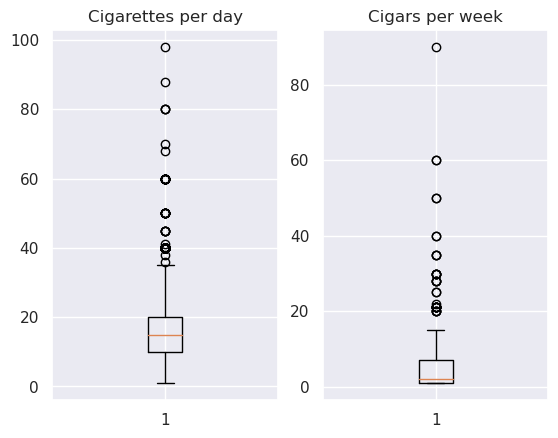

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(data["cigarettes"].dropna())
ax1.set_title("Cigarettes per day")
ax2.boxplot(data["cigars"].dropna())
ax2.set_title("Cigars per week")
plt.show()

In [9]:
print("Cigarettes NAs: " + str(sum(data.cigarettes.isna()/len(data))))
print("Cigars NAs: " + str(sum(data.cigars.isna()/len(data))))

Cigarettes NAs: 0.6564486830155305
Cigars NAs: 0.9785422343327954


### Drinking locations

In [10]:
loc1 = pd.DataFrame({"location" : data.drink_loc1, "preference" : 1})
loc2 = pd.DataFrame({"location" : data.drink_loc2, "preference" : 2})
locs = pd.concat([loc1, loc2])

<AxesSubplot:xlabel='count', ylabel='location'>

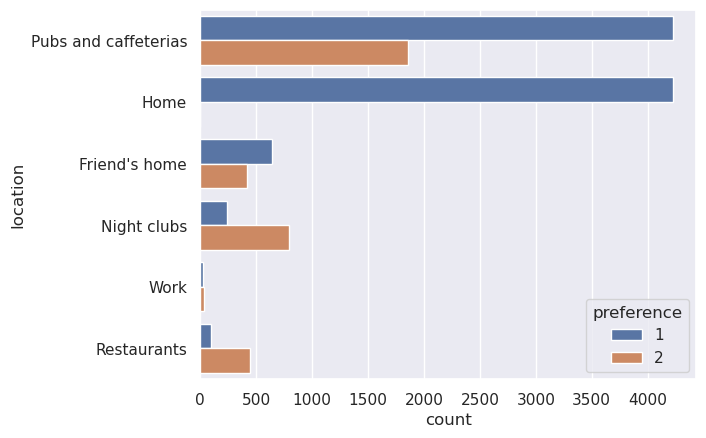

In [11]:
sns.countplot(data=locs, y="location", hue="preference")

### political_espectrum

11697 responses out of 17616 interviewed people.


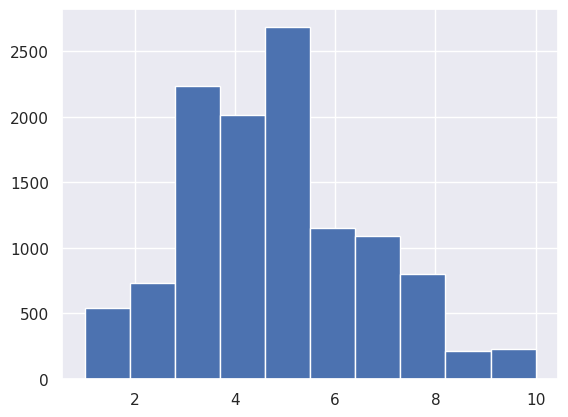

In [12]:
data.political_espectrum.hist()
print_num_responses(data.political_espectrum)

### age

17562 responses out of 17616 interviewed people.


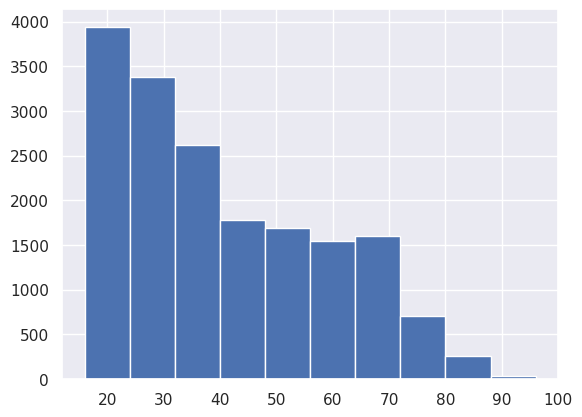

In [13]:
data.age.hist()
print_num_responses(data.age)

### income

count    1.759800e+04
mean     2.870503e+05
std      6.089171e+05
min      1.000000e+03
50%      3.000000e+04
80%      2.500000e+05
90%      7.000000e+05
95%      2.500000e+06
max      2.500000e+06
Name: population, dtype: float64
17598 responses out of 17616 interviewed people.


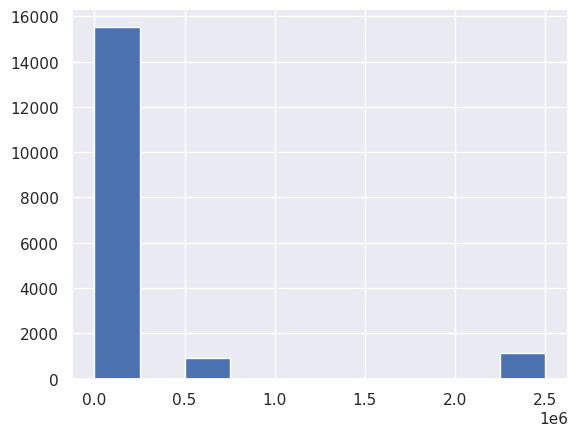

In [14]:
print(data.population.describe(percentiles=[0.5, 0.8, 0.9, 0.95]))
data.population.hist()
print_num_responses(data.population)

### occupation

16826 responses out of 17616 interviewed people.


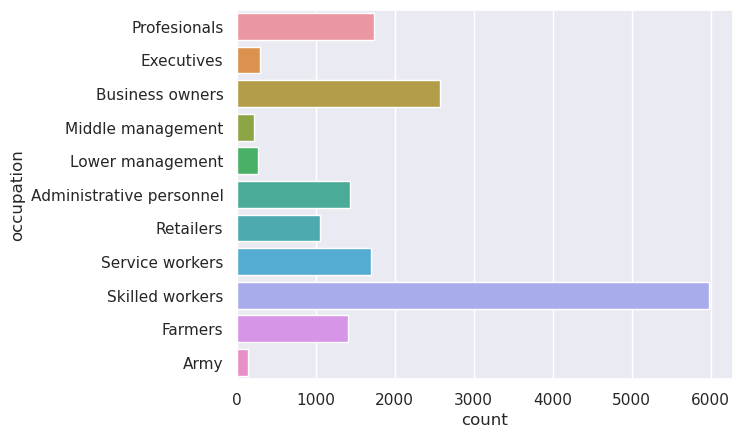

In [15]:
sns.countplot(data=data, y="occupation")
print_num_responses(data.occupation)

### socioeconomic_condition

17048 responses out of 17616 interviewed people.


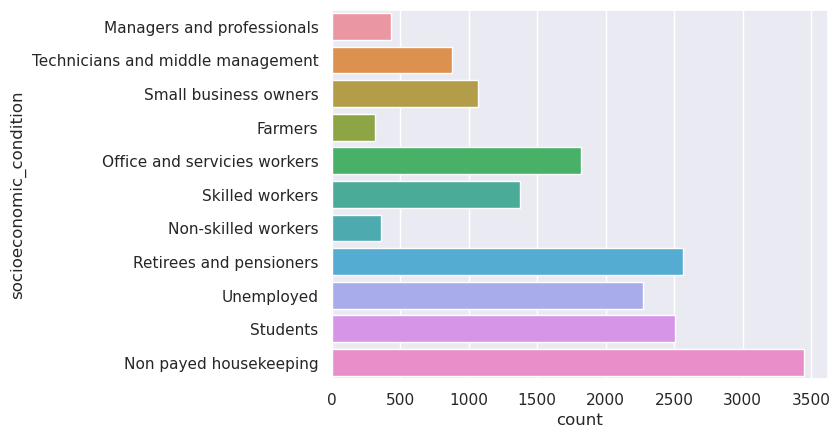

In [16]:
sns.countplot(data=data, y="socioeconomic_condition")
print_num_responses(data.socioeconomic_condition)

### sex

In [17]:
data.sex.value_counts(dropna=False)

female    9016
male      8576
NaN         24
Name: sex, dtype: int64

### education_level

17616 responses out of 17616 interviewed people.


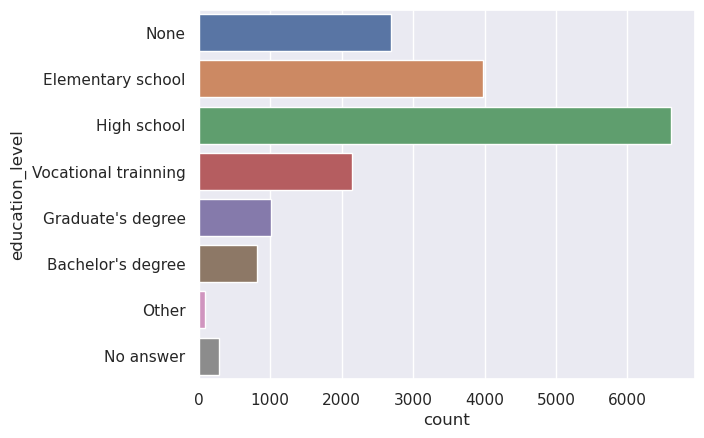

In [18]:
sns.countplot(data=data, y="education_level")
print_num_responses(data.education_level)

### sector

16991 responses out of 17616 interviewed people.


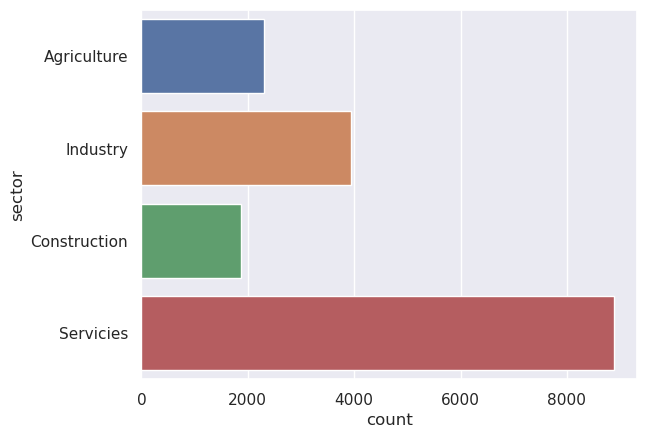

In [19]:
sns.countplot(data=data, y="sector")
print_num_responses(data.sector)

### status

16597 responses out of 17616 interviewed people.


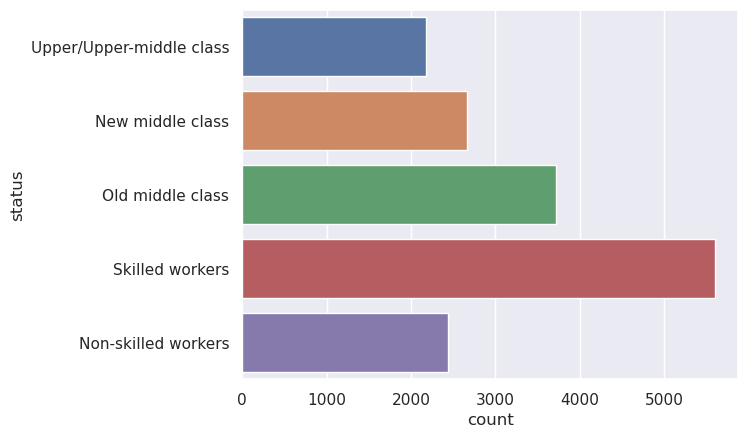

In [20]:
sns.countplot(data=data, y="status")
print_num_responses(data.status)

### UBEs

<AxesSubplot:>

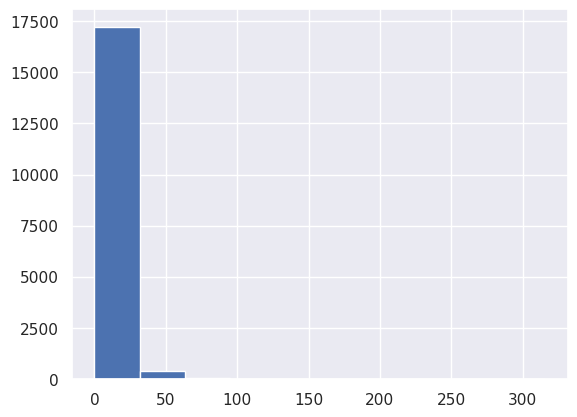

In [21]:
data.UBE.hist()

<AxesSubplot:>

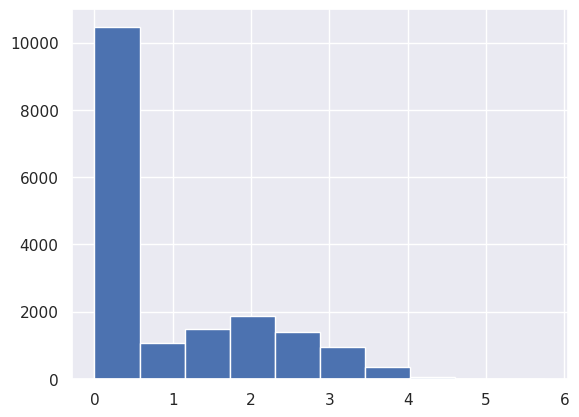

In [22]:
np.log1p(data.UBE).hist()

<AxesSubplot:>

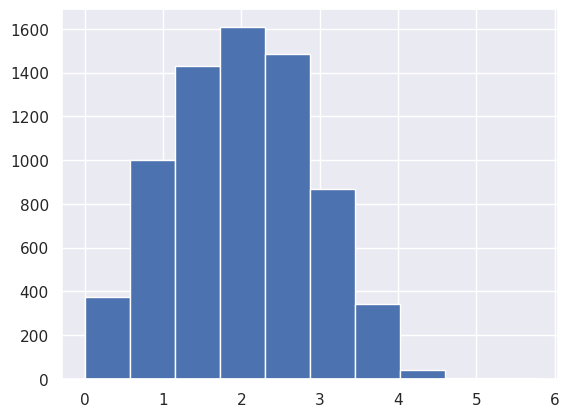

In [23]:
np.log(data.query("UBE > 0").UBE).hist()

In [24]:
np.exp(2)

7.38905609893065

### Factor plot sex, age, UBE

Age vs UBE vs sex is the most revealing.

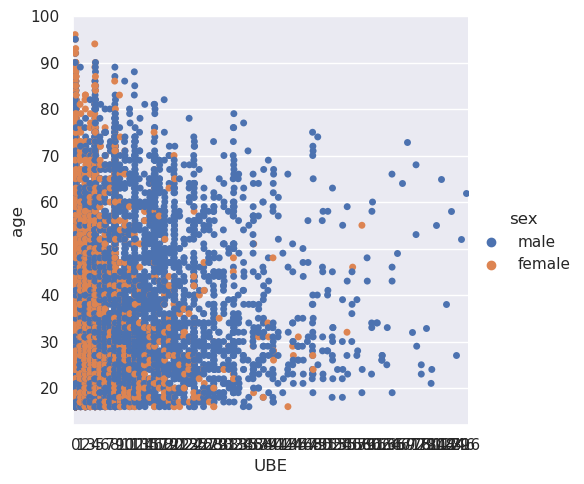

In [25]:
sns.catplot(x="UBE", y="age", hue="sex", data=data)

For income, we filter outliers of more than 100 UBEs in the 3 measured days.

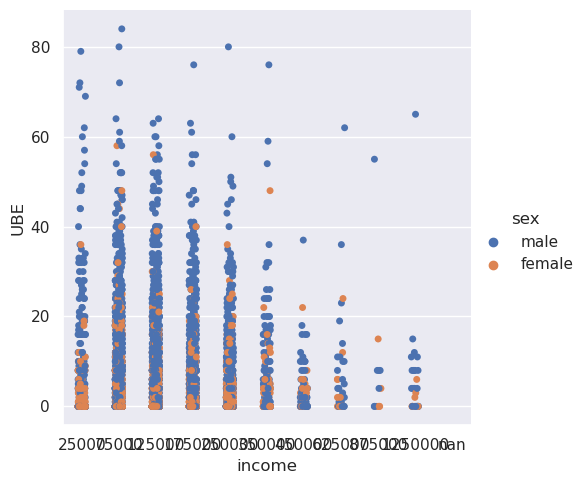

In [26]:
sns.catplot(x="income", y="UBE", hue="sex", data=data.query("UBE < 100"))

Do people who eran more drink less? Or are they just a smaller group? Points get overlaped in this plots.

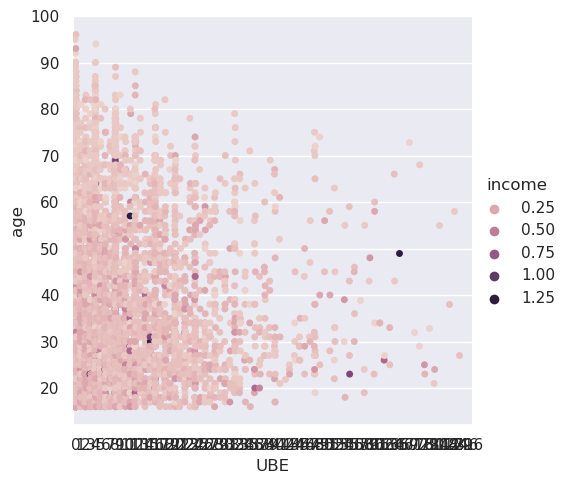

In [27]:
sns.catplot(x="UBE", y="age", hue="income", data=data)